# Stochastic Hydrology Final Project implementation

Analysis of soil moisture distribution in St.Louis and Denver with
time series model tools

In [1]:
# Read Text Files with Pandas using read_csv()
  
# importing pandas
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# link to the personal google drive account to import ENSO_SST.txt
from google.colab import drive
drive.mount('/content/drive')

# setup the path to certain folder
# path allow user to link to the folder where store the target file
path = '/content/drive/MyDrive/CEE 6232/Final Project' 
%cd $path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CEE 6232/Final Project


# Read the Soil Moisture Data (Colorado River Basin)

In [2]:
df_co = pd.read_csv("soil_moisture_co.csv",delimiter=",")
df_stl = pd.read_csv("soil_moisture_stl.csv",delimiter=",")

In [3]:
# Colorado and St Louis soil moisture from 2005/01/01 to 2012/12/31 (8-year period)
df_co = df_co[:70128]
df_stl = df_stl[:70128] # 70128

In [4]:
# Aim to find the monthly averaged soil moisture from 2005/01/01 to 2012/12/31 (8-year period)
sm_co = df_co.co_sm_data.tolist()
sm_stl = df_stl.stl_sm_data.tolist() 
sm_co_avg = [np.mean(sm_co[i*720:(i+1)*720]) for i in range(96)]
sm_stl_avg = [np.mean(sm_stl[i*720:(i+1)*720]) for i in range(96)]

In [46]:
start = datetime.datetime(2005,1,1)
step = datetime.timedelta(minutes=60)
time = [start + step*t for t in range(len(sm_co))]

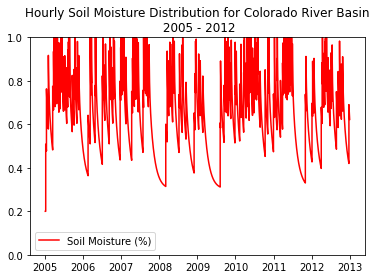

In [49]:
plt.plot(time,sm_co,"r-",markersize=2.)
plt.title('Hourly Soil Moisture Distribution for Colorado River Basin\n 2005 - 2012')
plt.ylim((0,1))
plt.legend(['Soil Moisture (%)'])

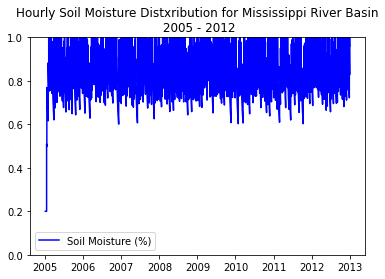

In [50]:
plt.plot(time,sm_stl,"b-", markersize=2.0)
plt.title('Hourly Soil Moisture Distxribution for Mississippi River Basin\n 2005 - 2012')
plt.ylim((0,1))
plt.legend(['Soil Moisture (%)'])

In [51]:
start = datetime.datetime(2005,1,1)
step = datetime.timedelta(days=30)
time = [start + step*t for t in range(len(sm_co_avg))]

Plot the sample of monthly averaged soil mositure for 8 years first. (2005-2012)

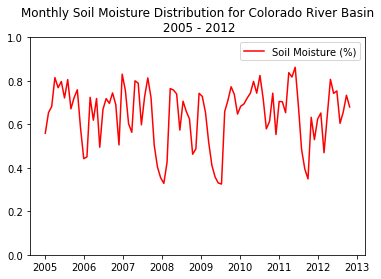

In [53]:
plt.plot(time,sm_co_avg,"r-",markersize=2.)
plt.title('Monthly Soil Moisture Distribution for Colorado River Basin\n 2005 - 2012')
plt.ylim((0,1))
plt.legend(['Soil Moisture (%)'])

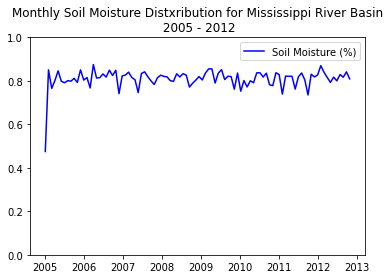

In [54]:
plt.plot(time,sm_stl_avg,"b-", markersize=2.0)
plt.title('Monthly Soil Moisture Distxribution for Mississippi River Basin\n 2005 - 2012')
plt.ylim((0,1))
plt.legend(['Soil Moisture (%)'])

# Auto-Correlation

To further implment the technique we learnt in class, we have to first find the auto-correlation of the soil moisture distribution. And use these found to use ARMA model for forecasting.

First, to use ARMA model, we have to check if the process is stationary by using Augmented Dickey Fuller test, ie. adfuller(). Here, null hypothesis is used; we set the threshold of p-value to 0.05 which means when p-value > 0.05, then we could said this process is non-stationary and must do differece.

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(sm_co_avg)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.181289
p-value: 0.000010


In [10]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(sm_stl_avg)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -16.917334
p-value: 0.000000


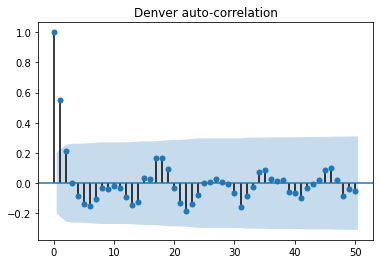

In [55]:
from statsmodels.graphics.tsaplots import plot_acf
# Use the Autocorrelation function
plot_acf(sm_co_avg, lags=50)
# Show the autocorrelation as a plot
plt.title("Denver auto-correlation")
plt.show()

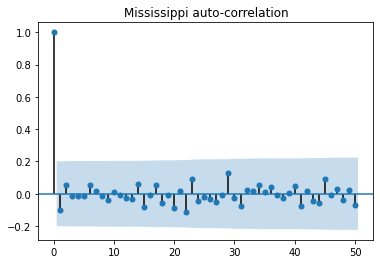

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
# Use the Autocorrelation function
plot_acf(sm_stl_avg, lags=50)
# Show the autocorrelation as a plot
plt.title("Mississippi auto-correlation")
plt.show()

# ARMA MODEL

We used arma model to try to find out which model is best-fit for the soil moisture in Colorado River Basin.

In [13]:
# Train ARMA Model
from statsmodels.tsa.arima_model import ARIMA
# in ARIMA model we set p=1, d(differencing)=0, and q=1 to achieve ARMA(1,1) model
model = ARIMA(sm_co_avg,order=(1,0,1)) 
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                     ARMA(1, 1)   Log Likelihood                  73.906
Method:                       css-mle   S.D. of innovations              0.112
Date:                Wed, 04 May 2022   AIC                           -139.811
Time:                        17:20:59   BIC                           -129.554
Sample:                             0   HQIC                          -135.665
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6454      0.023     27.609      0.000       0.600       0.691
ar.L1.y        0.4273      0.148      2.881      0.005       0.137       0.718
ma.L1.y        0.1839      0.155      1.187      0.238      -0.120       0.488
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3402           +0.0000j            2.3402            0.0000
MA.1           -5.4373           +0.0000j            5.4373            0.5000
-----------------------------------------------------------------------------
"""

In [14]:
# Train ARMA Model
from statsmodels.tsa.arima_model import ARIMA
# in ARIMA model we set p=1, d(differencing)=0, and q=1 to achieve ARMA(1,1) model
model = ARIMA(sm_stl,order=(1,0,1)) 
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                70128
Model:                     ARMA(1, 1)   Log Likelihood              181051.490
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 04 May 2022   AIC                        -362094.980
Time:                        17:22:14   BIC                        -362058.348
Sample:                             0   HQIC                       -362083.683
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8094      0.003    239.396      0.000       0.803       0.816
ar.L1.y        0.9797      0.001   1255.974      0.000       0.978       0.981
ma.L1.y       -0.0047      0.004     -1.201      0.230      -0.012       0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0208           +0.0000j            1.0208            0.0000
MA.1          215.0113           +0.0000j          215.0113            0.0000
-----------------------------------------------------------------------------
"""

# ARMA(1,1) Forecast with 1-step forecasting method

Since we fit the ARMA(1,1) model with data, we have to find the $\phi$ for two ARMA(1,1) models,respectively.

Step 1. Prepare the coefficient for the ARMA(1,1) model.

In [15]:
import statsmodels.api as sm
phi_co = sm.tsa.acf(sm_co_avg, nlags=2)[2]/sm.tsa.acf(sm_co_avg,nlags=2)[1]
phi_stl = sm.tsa.acf(sm_stl_avg, nlags=2)[2]/sm.tsa.acf(sm_stl_avg, nlags=2)[1]
rho_co_1 = sm.tsa.acf(sm_co_avg, nlags=1)[1]
rho_stl_1 = sm.tsa.acf(sm_stl_avg, nlags=1)[1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [16]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(x**2+(2*rho_co_1*phi_co-1-phi_co**2)*x/(phi_co-rho_co_1)+1,x)

[-4.03140529241096, -0.248052459990187]

In [17]:
theta_co = -0.248

In [18]:
sigma_a_co = np.sqrt(1/((theta_co-phi_co)**2/(1-phi_co**2)+1))

In [19]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
solve(x**2+(2*rho_stl_1*phi_stl-1-phi_stl**2)*x/(phi_stl-rho_stl_1)+1,x)

[-2.15100008476405, -0.464900028169776]

In [20]:
theta_stl = -0.4649

In [22]:
sigma_a_stl = np.sqrt(1/((theta_stl-phi_stl)**2/(1-phi_stl**2)+1))

In [23]:
def forecast(state,phi,theta,sigma_a):
  ans = []
  n = len(state)
  a_prev = 0
  for i in range(n-1):
    a = np.random.normal(0, sigma_a, 1)
    s = phi*state[i]+a-theta*a_prev
    a_prev = a
    ans.append(s)
  return ans

co_for = forecast(sm_co_avg,phi_co,theta_co,sigma_a_co)
stl_for = forecast(sm_stl_avg,phi_stl,theta_stl,sigma_a_stl)
time = [start + step*t for t in range(len(sm_co_avg))]

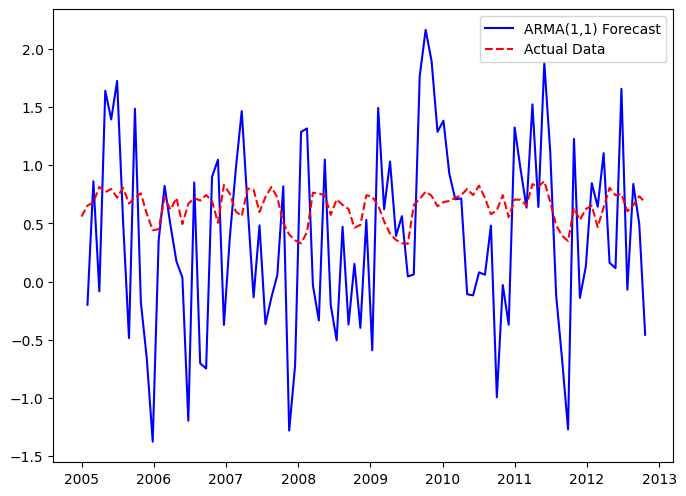

In [59]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(time[1:],co_for,"b",label="ARMA(1,1) Forecast")
plt.plot(time,sm_co_avg,"r--", label="Actual Data")
plt.legend()

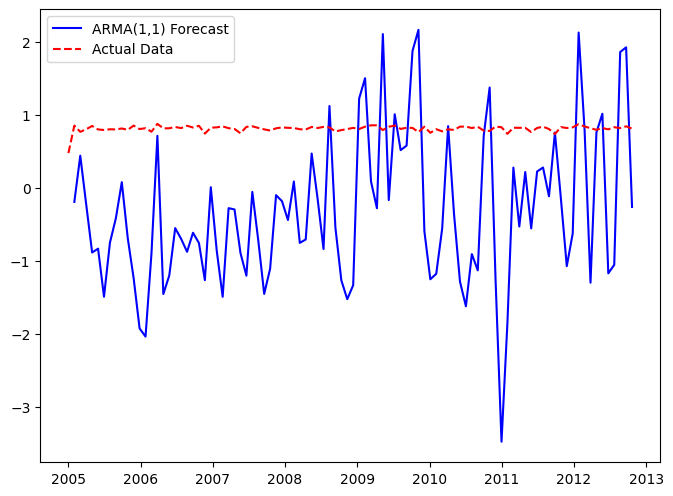

In [60]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(time[1:],stl_for,"b",label="ARMA(1,1) Forecast")
plt.plot(time,sm_stl_avg,"r--", label="Actual Data")
plt.legend()

# Kalman Filtering

From here, we'll start to find the relation between soil moisture distribution in Colorado and soil moisture distribution in St Louis. The tricky point is, since we have no information about transition matrix, H between two different soil moisture distribution, we have to guess the initial value of H and modified the value of H until we obtained the optimal result.

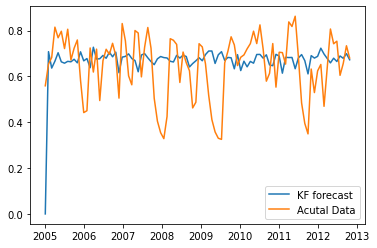

In [58]:
#@title
from matplotlib import figure
import random
# Kalman Filter by using AR(1) as dynamic equation
sigma_w = 1 # assumption that white-noise term W(k)~N(0,1)
x_hat_k_k = 0
sigma_k_k = sigma_w
H = 1.2
sigma_v = random.uniform(0,0.1) # unit: m3/s
Sigma = 1
k = len(sm_co_avg) # length of forecast

# storage
x_hat = [0 for i in range(k)]

for i in range(0,k-1):
  z_k1 = sm_stl_avg[i+1]
  sigma_k1_k = np.sqrt(1/(phi_stl**2 * sigma_k_k**2 + Sigma**2 * sigma_w**2))
  sigma_k1_k1 = np.sqrt(np.reciprocal(H**2/sigma_v**2 + sigma_k1_k**2))
  x_hat_k1_k = phi_stl*x_hat_k_k
  x_hat_k1_k1 = sigma_k1_k1**2 * (H*z_k1/sigma_v**2 + sigma_k1_k**2*x_hat_k1_k)
  x_hat[i+1] = x_hat_k1_k1

  # change the variable for next time step
  sigma_k_k = sigma_k1_k1
  x_hat_k_k = x_hat_k1_k1

# Test error
# ==============================================================================
# error_mse = mean_squared_error(
#                 y_true = sm_co_avg,
#                 y_pred = x_hat
#             )
# print(f"Test error (mse): {error_mse}")

plt.plot(time,x_hat,label="KF forecast")
plt.plot(time,sm_co_avg,label="Acutal Data")
plt.legend()